Что дальше?

Это начало лабораторной работы по Классификации.

Забираем любой датасет (кроме Iris, Wine, Abalon) по ссылке (внутри группы все датасеты должны быть разными):

https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=25&sort=desc&orderBy=NumHits&search=&Types=Tabular&Types=Text

1 часть

1) Скачать один из наборов данных

2) Загрузить данные в датафрейм

3) Вывести статистическую информацию о наборе данных

4) Вывести названия столбцов и строк

5) Заменить категориальные данные количественными

6) Визуализировать данные с помощью Matplotlib и Seaborn

7) Должно быть не менее 2х визуализаций на каждый признак.

8) Выберите самые красивые визуализации!

9) Должно быть не менее 3х групповых визуализаций

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков
from sklearn.preprocessing import LabelEncoder # кодировка символов в числовые значения
from sklearn.preprocessing import MinMaxScaler # нормализация

In [5]:
# загрузка данных
train = pd.read_csv('/content/mushrooms.csv')

In [6]:
# все категории таблицы
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'class': ['p' 'e']
Уникальные значения в столбце 'cap-shape': ['x' 'b' 's' 'f' 'k' 'c']
Уникальные значения в столбце 'cap-surface': ['s' 'y' 'f' 'g']
Уникальные значения в столбце 'cap-color': ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Уникальные значения в столбце 'bruises': ['t' 'f']
Уникальные значения в столбце 'odor': ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Уникальные значения в столбце 'gill-attachment': ['f' 'a']
Уникальные значения в столбце 'gill-spacing': ['c' 'w']
Уникальные значения в столбце 'gill-size': ['n' 'b']
Уникальные значения в столбце 'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Уникальные значения в столбце 'stalk-shape': ['e' 't']
Уникальные значения в столбце 'stalk-root': ['e' 'c' 'b' 'r' '?']
Уникальные значения в столбце 'stalk-surface-above-ring': ['s' 'f' 'k' 'y']
Уникальные значения в столбце 'stalk-surface-below-ring': ['s' 'f' 'y' 'k']
Уникальные значения в столбце 'stalk-color-above-ring': ['w' 'g' 'p' 'n'

In [7]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# преобразование категориальных меток в числовые значения
labelencoder = LabelEncoder()

for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])

In [9]:
# все категории таблицы (числовые)
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'class': [1 0]
Уникальные значения в столбце 'cap-shape': [5 0 4 2 3 1]
Уникальные значения в столбце 'cap-surface': [2 3 0 1]
Уникальные значения в столбце 'cap-color': [4 9 8 3 2 5 0 7 1 6]
Уникальные значения в столбце 'bruises': [1 0]
Уникальные значения в столбце 'odor': [6 0 3 5 2 1 8 7 4]
Уникальные значения в столбце 'gill-attachment': [1 0]
Уникальные значения в столбце 'gill-spacing': [0 1]
Уникальные значения в столбце 'gill-size': [1 0]
Уникальные значения в столбце 'gill-color': [ 4  5  2  7 10  3  9  1  0  8 11  6]
Уникальные значения в столбце 'stalk-shape': [0 1]
Уникальные значения в столбце 'stalk-root': [3 2 1 4 0]
Уникальные значения в столбце 'stalk-surface-above-ring': [2 0 1 3]
Уникальные значения в столбце 'stalk-surface-below-ring': [2 0 3 1]
Уникальные значения в столбце 'stalk-color-above-ring': [7 3 6 4 0 2 5 1 8]
Уникальные значения в столбце 'stalk-color-below-ring': [7 6 3 0 4 2 8 5 1]
Уникальные значения в столбце 'veil-type

In [10]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
# общая статистика
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
# в данных нет пропусков, все типы - int64
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [13]:
train.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


(array([ 452.,    0.,    4.,    0., 3152.,    0.,  828.,    0.,   32.,
        3656.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

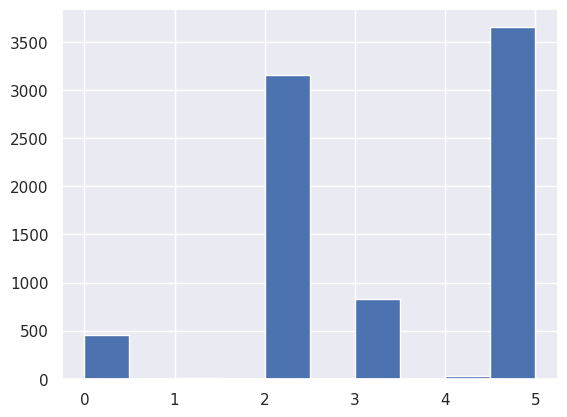

In [14]:
# распределение всех грибов по форме шляпы
# больше всех грибов с выпуклой формой (значение - 5)
# меньше всех - с конической формой (значение - 1)
plt.hist(train['cap-shape'])

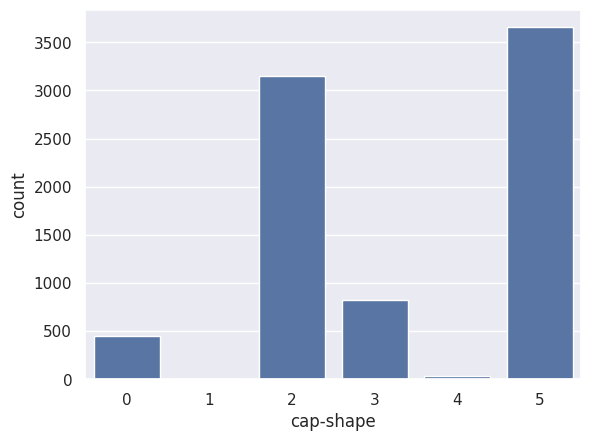

In [16]:
sns.countplot(x=train["cap-shape"]);

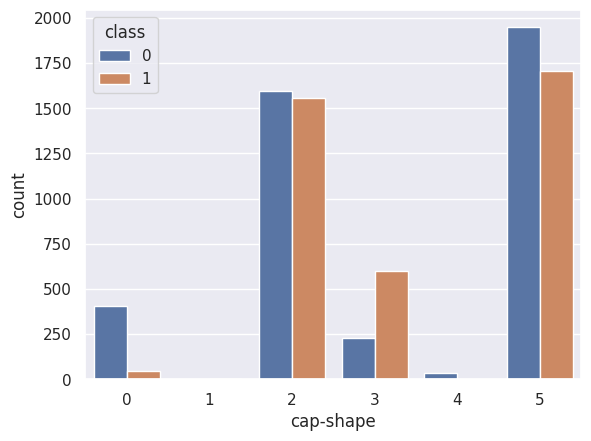

In [18]:
# распределение ядовитых грибов внутри каждой группы, которые отличаются формой шляпы
# для выпуклой и плоской форм шляп доли ядовитых и съедобных грибов примерно равны (значения 2 и 5)
# для колоколообразной и выпуклой с бугорком форм шляп доли ядовитых и съедобных сильно разнятся (значения 0 и 3)
sns.countplot(data=train, x="cap-shape", hue='class');

In [27]:
# нормализация мин-макс
scaler_mm = MinMaxScaler()

train[['mm-cap-shape','mm-cap-surface', 'mm-cap-color', 'mm-odor', 'mm-gill-color', 'mm-stalk-root', 'mm-stalk-surface-above-ring', 'mm-stalk-surface-below-ring', 'mm-stalk-color-above-ring', 'mm-stalk-color-below-ring', 'mm-veil-color', 'mm-ring-number', 'mm-ring-type', 'mm-spore-print-color', 'mm-population', 'mm-habitat']] = scaler_mm.fit_transform(train[['cap-shape','cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']])
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,mm-stalk-surface-above-ring,mm-stalk-surface-below-ring,mm-stalk-color-above-ring,mm-stalk-color-below-ring,mm-veil-color,mm-ring-number,mm-ring-type,mm-spore-print-color,mm-population,mm-habitat
0,1,5,2,4,1,6,1,0,1,4,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,5,2,9,1,0,1,0,0,4,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0,2,8,1,3,1,0,0,5,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,5,3,8,1,6,1,0,1,5,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,5,2,3,0,5,1,1,0,4,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


In [29]:
train_norm = train.copy()

# удаление старых столбцов после нормализации
columns_to_drop = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
train_norm.drop(columns=columns_to_drop, inplace=True)

train_norm.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,mm-cap-shape,mm-cap-surface,mm-cap-color,...,mm-stalk-surface-above-ring,mm-stalk-surface-below-ring,mm-stalk-color-above-ring,mm-stalk-color-below-ring,mm-veil-color,mm-ring-number,mm-ring-type,mm-spore-print-color,mm-population,mm-habitat
0,1,1,1,0,1,0,0,1.0,0.666667,0.444444,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,1,1,0,0,0,0,1.0,0.666667,1.000000,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,1,1,0,0,0,0,0.0,0.666667,0.888889,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,1,1,0,1,0,0,1.0,1.000000,0.888889,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,0,1,1,0,1,0,1.0,0.666667,0.333333,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


In [30]:
train_norm.describe()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,mm-cap-shape,mm-cap-surface,mm-cap-color,...,mm-stalk-surface-above-ring,mm-stalk-surface-below-ring,mm-stalk-color-above-ring,mm-stalk-color-below-ring,mm-veil-color,mm-ring-number,mm-ring-type,mm-spore-print-color,mm-population,mm-habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.415559,0.974151,0.161497,0.309207,0.567208,0.0,0.669621,0.609224,0.500520,...,0.525029,0.534548,0.727043,0.724335,0.655178,0.534712,0.572994,0.449594,0.728804,0.251436
std,0.499708,0.492848,0.158695,0.368011,0.462195,0.495493,0.0,0.320866,0.409958,0.282869,...,0.207153,0.225325,0.237718,0.238411,0.080890,0.135532,0.450418,0.297833,0.250416,0.286663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.400000,0.000000,0.333333,...,0.333333,0.333333,0.750000,0.750000,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.600000,0.666667,0.444444,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.888889,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


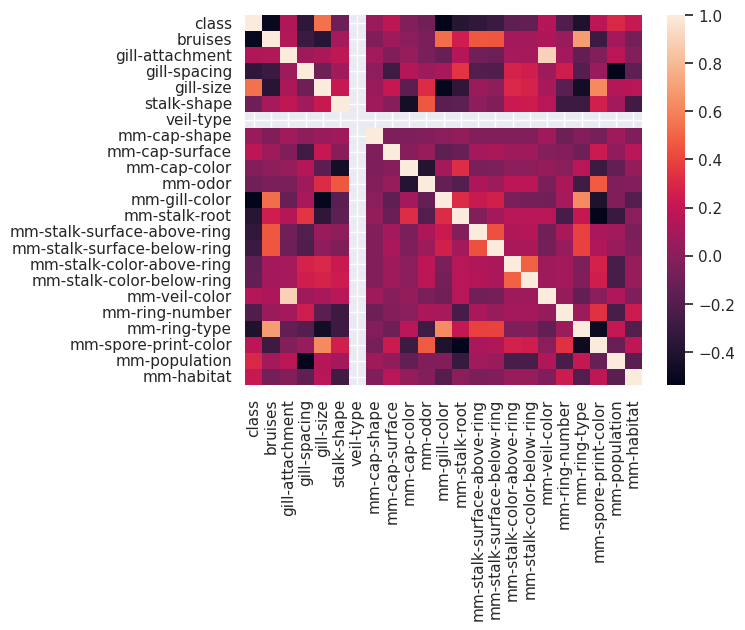

In [31]:
sns.heatmap(train_norm.corr(numeric_only = True));